In [84]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Task 1

## PCA

In [85]:
df = pd.read_csv('drug200.csv')

In [86]:
from sklearn.preprocessing import LabelEncoder


#function to label
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])


#create a list of data needed to be labeled
categories = ['Sex', 'BP', 'Cholesterol', 'Drug']

for label in categories:
    label_encoder(label)

In [87]:
X = df.drop('Drug', axis=1)
Y = df['Drug']

t = StandardScaler()
X_t = t.fit_transform(X)

In [88]:
pca = PCA(n_components=2, svd_solver='full')
x_pca = pca.fit_transform(X_t, )

c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

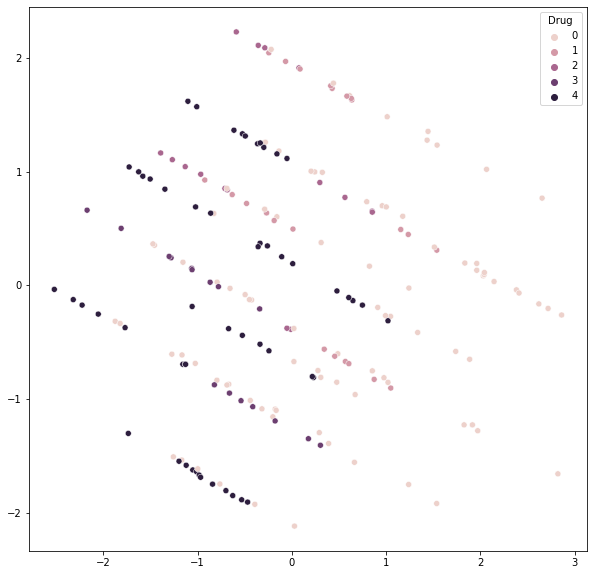

In [89]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x_pca[:, 0], x_pca[:, 1], hue=Y)

In [90]:
pca.explained_variance_

array([1.29836642, 1.0817823 ])

In [91]:
pca.explained_variance_ratio_


array([0.25837492, 0.21527468])

## TSNE


In [104]:
tsne = TSNE(n_components=2, init="pca",learning_rate='auto')
X_tsne = tsne.fit_transform(X)


c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

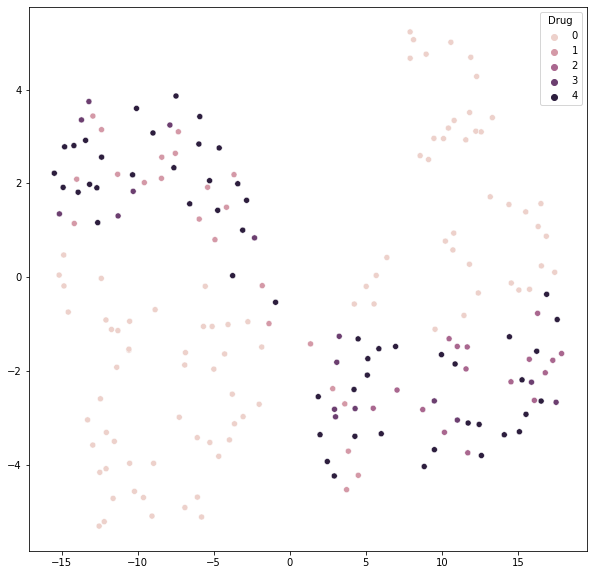

In [101]:
plt.figure(figsize=(10, 10))
sns.scatterplot(X_tsne[:,0],X_tsne[:,1],hue=Y)

In [98]:
X_tsne.shape

(200, 2)

# Task 2